In [1]:
import os, sys, time
import cv2
import numpy as np
from skimage import exposure
sys.path.append("../pyusct/")
from rfdata import RFdata

/root/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import matplotlib.pyplot as plt
% matplotlib inline

In [5]:
LOCAL_PATH = "/mnt/nas/"
SOURCE_DIR = os.path.join(LOCAL_PATH, "nb_usctsim/sim_015/")
SA_DIR = os.path.join(LOCAL_PATH, "tmp/SA/")
OUT_DIR = os.path.join(LOCAL_PATH, "tmp/GT/")

### getting the list of all subdir and generate label

In [4]:
for i in range(1, 51):
    trial = "trial_" + str(i).zfill(3)
    source_path = os.path.join(SOURCE_DIR, trial + "/")
    print(source_path)
    rf = RFdata(source_path)
    
    test = exposure.rescale_intensity(rf.medium_sct, out_range=(0, 255))
    cv2.imwrite(os.path.join(OUT_DIR, trial + '.bmp'), test)

/mnt/nas/nb_usctsim/sim_015/trial_001/
/mnt/nas/nb_usctsim/sim_015/trial_002/
/mnt/nas/nb_usctsim/sim_015/trial_003/
/mnt/nas/nb_usctsim/sim_015/trial_004/
/mnt/nas/nb_usctsim/sim_015/trial_005/
/mnt/nas/nb_usctsim/sim_015/trial_006/
/mnt/nas/nb_usctsim/sim_015/trial_007/
/mnt/nas/nb_usctsim/sim_015/trial_008/
/mnt/nas/nb_usctsim/sim_015/trial_009/
/mnt/nas/nb_usctsim/sim_015/trial_010/
/mnt/nas/nb_usctsim/sim_015/trial_011/
/mnt/nas/nb_usctsim/sim_015/trial_012/
/mnt/nas/nb_usctsim/sim_015/trial_013/
/mnt/nas/nb_usctsim/sim_015/trial_014/
/mnt/nas/nb_usctsim/sim_015/trial_015/
/mnt/nas/nb_usctsim/sim_015/trial_016/
/mnt/nas/nb_usctsim/sim_015/trial_017/
/mnt/nas/nb_usctsim/sim_015/trial_018/
/mnt/nas/nb_usctsim/sim_015/trial_019/
/mnt/nas/nb_usctsim/sim_015/trial_020/
/mnt/nas/nb_usctsim/sim_015/trial_021/
/mnt/nas/nb_usctsim/sim_015/trial_022/
/mnt/nas/nb_usctsim/sim_015/trial_023/
/mnt/nas/nb_usctsim/sim_015/trial_024/
/mnt/nas/nb_usctsim/sim_015/trial_025/
/mnt/nas/nb_usctsim/sim_0

#### flip SA

In [23]:
for i in range(1, 51):
    trial = "trial_" + str(i).zfill(3)
    SA_path = os.path.join(SA_DIR, trial+'.bmp')
    A = cv2.imread(SA_path, 0)
    A = np.fliplr(A)
    A = SA_preprocess(A)
    cv2.imwrite(SA_path, A)
    print(SA_path)

/mnt/nas/tmp/SA/trial_001.bmp
/mnt/nas/tmp/SA/trial_002.bmp
/mnt/nas/tmp/SA/trial_003.bmp
/mnt/nas/tmp/SA/trial_004.bmp
/mnt/nas/tmp/SA/trial_005.bmp
/mnt/nas/tmp/SA/trial_006.bmp
/mnt/nas/tmp/SA/trial_007.bmp
/mnt/nas/tmp/SA/trial_008.bmp
/mnt/nas/tmp/SA/trial_009.bmp
/mnt/nas/tmp/SA/trial_010.bmp
/mnt/nas/tmp/SA/trial_011.bmp
/mnt/nas/tmp/SA/trial_012.bmp
/mnt/nas/tmp/SA/trial_013.bmp
/mnt/nas/tmp/SA/trial_014.bmp
/mnt/nas/tmp/SA/trial_015.bmp
/mnt/nas/tmp/SA/trial_016.bmp
/mnt/nas/tmp/SA/trial_017.bmp
/mnt/nas/tmp/SA/trial_018.bmp
/mnt/nas/tmp/SA/trial_019.bmp
/mnt/nas/tmp/SA/trial_020.bmp
/mnt/nas/tmp/SA/trial_021.bmp
/mnt/nas/tmp/SA/trial_022.bmp
/mnt/nas/tmp/SA/trial_023.bmp
/mnt/nas/tmp/SA/trial_024.bmp
/mnt/nas/tmp/SA/trial_025.bmp
/mnt/nas/tmp/SA/trial_026.bmp
/mnt/nas/tmp/SA/trial_027.bmp
/mnt/nas/tmp/SA/trial_028.bmp
/mnt/nas/tmp/SA/trial_029.bmp
/mnt/nas/tmp/SA/trial_030.bmp
/mnt/nas/tmp/SA/trial_031.bmp
/mnt/nas/tmp/SA/trial_032.bmp
/mnt/nas/tmp/SA/trial_033.bmp
/mnt/nas/t

## test

In [8]:
SA_path = os.path.join(SA_DIR, 'trial_001.bmp')

In [12]:
tmp = cv2.imread(SA_path, 0)

In [13]:
tmp.shape

(1024, 1024)

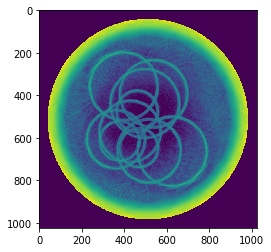

In [18]:
plt.imshow(tmp)

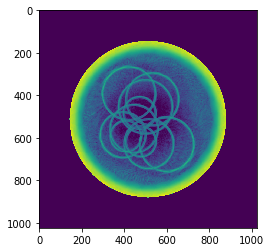

In [21]:
plt.imshow(SA_preprocess(tmp))

### function definition

In [20]:
def SA_preprocess(image):
    resized_image = cv2.resize(image, (800, 800))
    rec_image = cv2.copyMakeBorder(resized_image,
                                  112,112,112,112,
                                  cv2.BORDER_CONSTANT, value=0)
    
    return rec_image